## Генератор моделей для симулятора 

**Класс который генерирует модели для симулятора. Он использует начальную заготовку (RIENM1_INIT.DATA) которая лежит в папке и на ее основе, меняя ряд свойств, генерирует простые модели. На данный момент доступны следующие свойства к изменению:**

In [1]:
from model_create import ModelGenerator, clear_folders
clear_folders()
# Параметры, которые необходимо расчитать:
parameters = ['FOPT', 'WOPR:*', 'FPR', 'FWPT', 'FWCT', 'WBHP:P1', 'WGPR:P1', 'WGOR:P1'] #, 'FWPT', 'FLPT', 'FGPT', 'FWIT']

# Зададим дату начала расчета и продолжительность:
start_date = "1 'JAN' 2020"
mounths = 1 # количество итераций;
days = 30 # продолжительность итерации;
# Зададим размеры модели:
nx = 16 # количество ячеек по х;
ny = 16 # количество ячеек по y;
nz = 8 # количество ячеек по z;
dx = 50 # длина модели по x, м;
dy = 50 # длина модели по y, м;
dz = 1 # размер ячейки по z, м;
tops_depth = 2500 # глубина залегания пласта, м;
# Зададим пористость и проницаемость:
por = 0.3 # пористость, д.ед;
permx = 500 # проницаемость по x, мД;
permy = permx # проницаемость по y, мД;
permz = permx*0.1 # проницаемость по z, мД;
# Зададим название, расположение добываюещей скважины и ее режим работы:
prod_names = ['P1'] # название скважин;
prod_xs=[16] # координата скважин по x;
prod_ys=[16] # координата скважин по y;
prod_z1s=[1] # начало интервала вскрытия по z;
prod_z2s=[8] # конец интервала вскрытия по z;
rezim = ['ORAT'] # Режим работы скважины
prod_q_oil = ['150'] # дебит, м3/сут;
prod_bhp = [150] # забойное давление, атм;
# Зададим название, расположение нагнетательной скважины и ее режим работы:
inj_names=['I1']
inj_xs=[1]
inj_ys=[1]
inj_z1s=[1] # вскроем разные пропластки для реализации вертикально-латерального заводнения
inj_z2s=[8]
inj_bhp = [500] 
# Другие настройки модели:
upr_rezim_water = False # Моделируем упруго-водонапорный режим
upr_rezim_gas = False # Моделируем газонапорный режим
# Задаем скин, радиус скважины (последовательно для добывающих и нагнетательных скважин):
skin = [0]*2
rw = [0.073]*2 
# Свойства нефти:
oil_den = 860 # плотность нефти, кг/м3;
wat_den = 1010 # плотность воды, кг/м3;
gas_den = 0.9 # плотность газа, кг/м3;
density = [oil_den, wat_den, gas_den]
# EQUILIBRIUM DATA:
p_depth = 2500 # Глубина замера пластового давления, м;
p_init = 320  # Начальное пластовое давление, атм;
o_w_contact = 2550 # Глубина ВНК, м;
pc_woc = 0 # Капиллярное давление на ВНК 
g_o_contact = 2400 # Глубина ГНК, м;
pc_goc = 0 # Капиллярное давление на ГНК

In [2]:
model_list = []
for i in range(0, 3):
    new_inj = [j + 50*i for j in inj_bhp]
    print(f'Модель №{i}')
    print('inj_bhp: ' + str(new_inj[0]))
    model_list.append(' inj_bhp - ' + str(new_inj[0]) + 'atm') 
    model_name = f'TEST_MODEL{i}' # осторожно с названием модели, могут быть ошибки;
    result_name = model_name
    model = ModelGenerator(init_file_name='RIENM1_INIT.DATA',start_date=start_date, mounths=mounths,
                days=days, nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, por=por, permx=permx,
                permy=permy, permz=permz, prod_names=prod_names, prod_xs=prod_xs,
                prod_ys=prod_ys, prod_z1s=prod_z1s, prod_z2s=prod_z2s, prod_q_oil=prod_q_oil,
                skin=skin, density=density, p_depth=p_depth, 
                p_init=p_init, o_w_contact=o_w_contact, pc_woc=pc_woc, g_o_contact=g_o_contact,
                pc_goc=pc_goc, tops_depth = tops_depth,
                inj_names=inj_names, inj_xs=inj_xs, inj_ys=inj_ys, inj_z1s=inj_z1s, inj_z2s=inj_z2s, inj_bhp=new_inj,
                rezim=rezim, prod_bhp=prod_bhp,
                upr_rezim_water=upr_rezim_water, upr_rezim_gas=upr_rezim_gas, rw=rw)
    model.create_model(model_name, result_name, parameters)

Модель №0
inj_bhp: 500
DIMENS detected
DIMENS written
START detected
START written
DX detected
DX written
DY detected
DY written
DZ detected
DZ written
TOPS detected
TOPS written
PORO detected
PORO written
PERMX detected
PERMX written
PERMY detected
PERMY written
PERMZ detected
PERMZ written
DENSITY detected
DENSITY written
EQUIL detected
EQUIL written
WELSPECS detected
WELSPECS written
COMPDAT detected
COMPDAT written
WCONPROD detected
WCONPROD written
WCONINJE detected
WCONINJE written
TSTEP detected
TSTEP written
TEST_MODEL0_RESULT.csv is created
TEST_MODEL0.csv is read
Trying port 50051
Exporting to folder: /home/re/Desktop/opm_examples/generator/model_folder/snapshots/
Модель №1
inj_bhp: 550
DIMENS detected
DIMENS written
START detected
START written
DX detected
DX written
DY detected
DY written
DZ detected
DZ written
TOPS detected
TOPS written
PORO detected
PORO written
PERMX detected
PERMX written
PERMY detected
PERMY written
PERMZ detected
PERMZ written
DENSITY detected
DENSITY

**Можно посмотреть на сетки из симулятора**
(Если установить библиотеку rips)

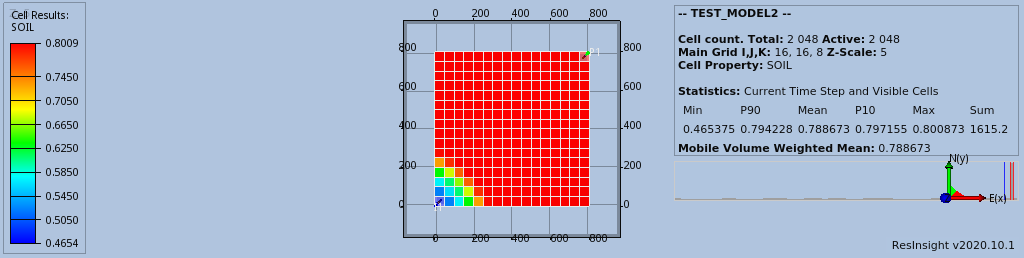

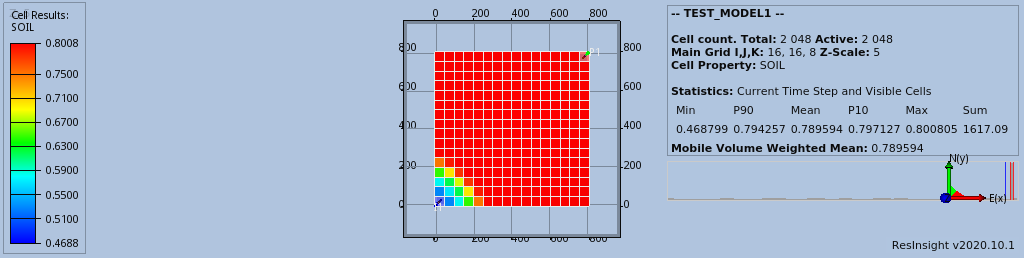

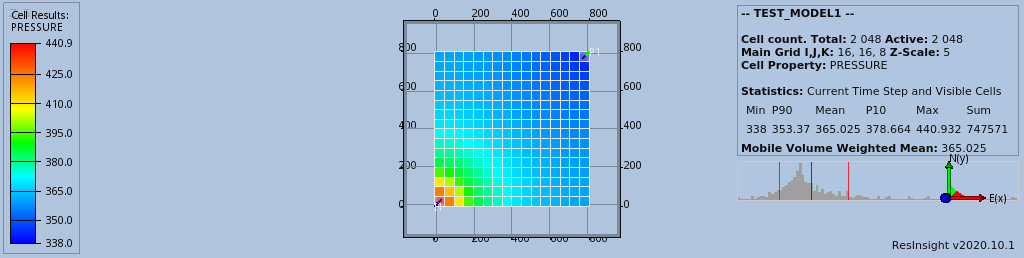

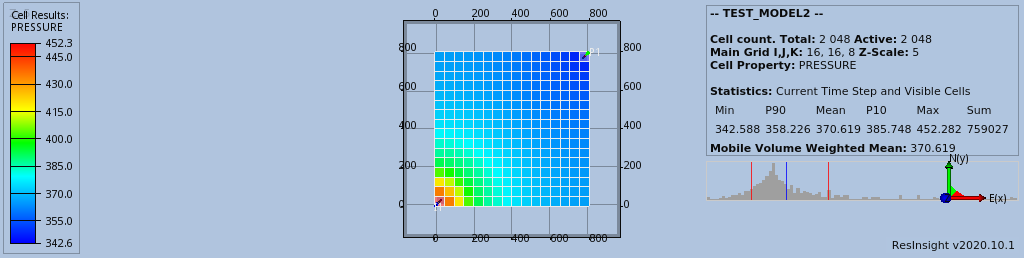

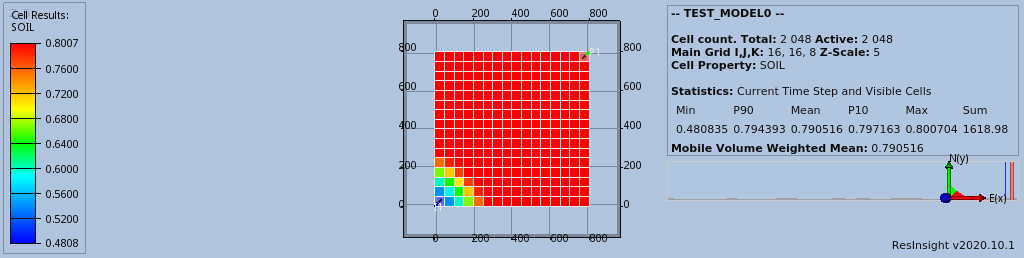

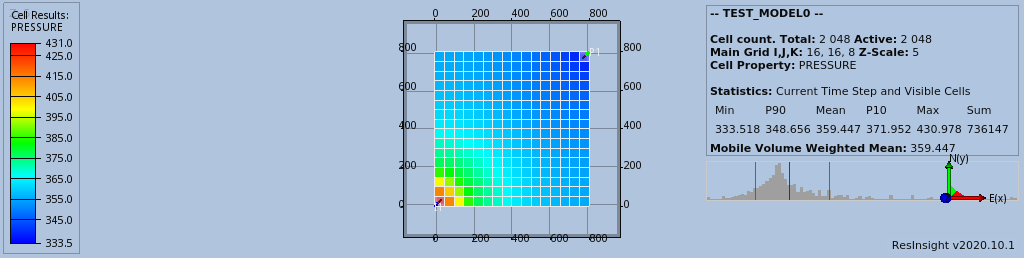

In [3]:
model.display_grids()

**А также на результаты расчета за все время**

In [5]:
title = 'Пластовое давление'
x_axis = 'Дата'
y_axis = 'Pres, атм'
model.summ_plot(['FPR'], x_axis=x_axis, y_axis=y_axis, title=title, name=model_list)
model.iplot_fig()